# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Для выполнения поставленной задачи потребуется проделать много работы. Сначала необходимо проверить датасет: достаточно ли в нем информации для выполнения поставленной задачи, как там заполнены значения, есть ли пропуски в данных, присутствуют ли ошибки.
При отсутствии данных нужно будет либо при возможности добавить их самостоятельно, либо запросить информацию у заказчика.
После того, как все данные будут обработаны и собраны, можно будет перейти к решению задачи.

### Общая информация о данных

Сначала нужно импортировать библиотеки, которые пригодятся для решения задачи. Само собой, это **pandas** - главный инструмент для работы с датасетами, и модуль **pyplot** из библиотеки **matplotlib**, который понадобится для построения графиков.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('real_estate_data.csv',sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Датасет был считан в переменную `data`. С ней мы и будем работать на протяжении всего исследования. Сразу можно сказать, что в данных тысячи пропусков, с которыми предстоит бороться, а также есть несоответствие типов (например, у `first_day_exposition` должен быть формат даты, а не строки) и змеиному регистру (16, 17 и 19 столбцы).

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


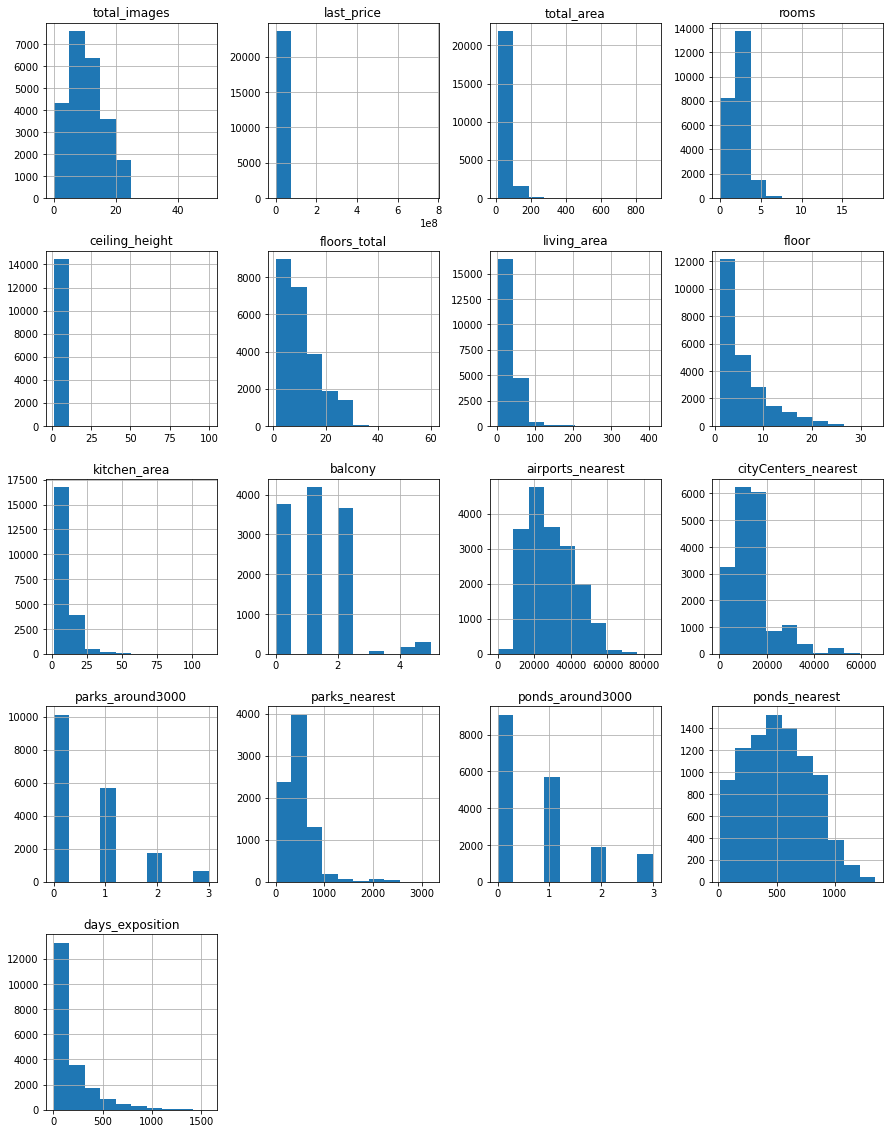

In [4]:
data.hist(figsize=(15,20));

При построении гистограмм по всем столбцам датасета (количественным) сразу заметно наличие выбросов там, где график не занимает почти всю координатную плоскость. Так, стобцы `last_price`,`total_area`,`ceiling_height` и др. наверняка содержат выбросы, в то время как `ponds_nearest` вполне похож на нормальное распределение, что свидетельствует об отсутствии выбросов (все-таки это картографические данные, и в них не должно быть ошибок).

### Предобработка данных

#### Устранение неправдоподобных данных

В задании было подчеркнуто, что ошибки могут содержаться в колонках, заполненных людьми. Стоит начать это проверять с одного из важных факторов - что, если указанные параметры площадей кухни и жилой территории в сумме превышают общую площадь квартиры?

In [5]:
data.loc[data['kitchen_area']+data['living_area']>data['total_area'],('kitchen_area','living_area','total_area')].head(10)

,kitchen_area,living_area,total_area
184,6.20,26.10,30.20
545,5.00,20.00,23.80
551,9.28,30.55,31.59
601,7.00,48.30,53.70
696,23.43,23.43,34.69
1060,20.50,39.00,50.00
1155,12.00,33.00,38.00
1354,19.00,38.00,54.50
1407,18.20,18.00,24.60
1854,14.84,55.00,60.20


Действительно, такие строки есть в датасете. Кто-то записывал одинаковые числа в оба столбца, у кого-то сумма значительно больше общей площади. От таких данных стоит избавиться, ведь они искажают реальную картину. Но избавимся не от всех: например, у человека площадь кухни 10,8 квадратных метров, а жилая - 20,6. Он записал в общую площадь не 31,4, а 30, т.к. не учел дробные части. Я считаю, что такие данные можно оставить, потому что они сильно не искажают информацию.

In [6]:
data = data.loc[~(data['kitchen_area']+data['living_area']>data['total_area']+2),:].reset_index(drop=True)

#### Поиск пропущенных значений в столбцах

Перейдем к заполнению пропусков, но сначала переведем все названия столбцов в змеиный регистр:

In [7]:
data = data.rename(columns = 
                  {'cityCenters_nearest':'city_centers_nearest',
                  'parks_around3000':'parks_around_3000',
                  'ponds_around3000':'ponds_around_3000'})

In [8]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14473 non-null  float64
 6   floors_total          23564 non-null  float64
 7   living_area           21747 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2765 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21372 non-null  float64
 13  balcony               12148 non-null  float64
 14  locality_name         23601 non-null  object 
 15  airports_nearest   

Первый столбец, в котором есть пропуски - это высота потолков. Просмотрим его более детально. Но учитывая, что в нём есть выбросы, гистограмму построим, указав реально возможную высоту потолков в качестве ограничения.

count    14473.000000
mean         2.768074
std          1.229049
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

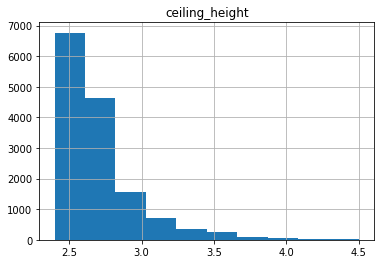

In [9]:
(data
 .query('not ceiling_height.isna()')
 .loc[(data['ceiling_height']<=4.5) & (data['ceiling_height']>=2.4),:]
 .hist('ceiling_height'))
data['ceiling_height'].describe()

Такое распределение выглядит правдоподобно. Есть доля квартир, где высота потолков выше 3м - скорее всего, это сталинки и подобные им объекты. Остальная масса квартир имеет высоту потолков до 3м - это могут быть как другие старые дома (хрущёвки), так и новостройки.

Их довольно трудно отделить друг от друга, чтобы заполнить высоту потолков для новостроек своим средним, а высоту потолков для старых домов - своим (года постройки у нас нет). Конечно, вряд ли есть старые дома выше 16 этажей, но вот новых домов высотой меньше 16 этажей весьма много.

Из-за этого принято решение заполнить пропуски средним значением, рассчитанным с исключением выбросов. Медиана приближена к значению, которое чаще встречается, но среднее в данном случае отразит некий баланс между старыми и новыми домами по высоте потолков.

In [10]:
data['ceiling_height'] = (data['ceiling_height']
                          .fillna(round(data.loc[(data['ceiling_height']<=4.5) & (data['ceiling_height']>=2.4),'ceiling_height'].mean(),2)))
data['ceiling_height'].isna().sum()

0

Поначалу на всякий случай перепроверяем, заполнились ли пропуски.

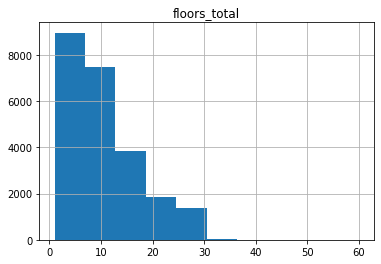

In [11]:
(data
 .query('not floors_total.isna()')
 .hist('floors_total'));

In [12]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

Пропуски в количестве этажей заполнили медианой. У нас еще не устранены выбросы, что искажает среднее, и медиана приближена к типичному значению высоты дома.

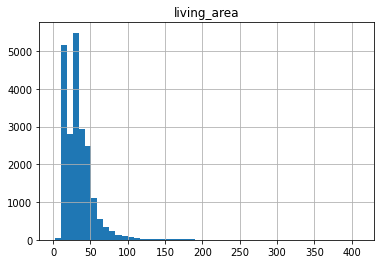

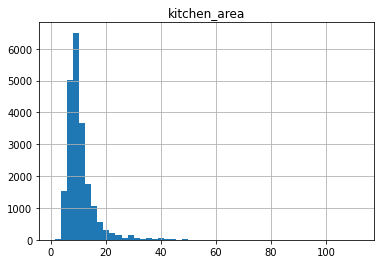

In [13]:
(data
 .query('not living_area.isna()')
 .hist('living_area',bins=50))
(data
 .query('not kitchen_area.isna()')
 .hist('kitchen_area',bins=50));

Жилую площадь и площадь кухни следует рассмотреть вместе, потому что параметры похожи друг с другом.
На графиках видны выбросы, а также можно отметить, что у жилой площади два пика - около 15 и 30 м^2, а у площади кухни всего один - около 10 м^2. Это можно объяснить тем, что в маленьких квартирах стараются сделать большую кухню, а спальню при этом рассчитывают только под кровать и минимум мебели.

In [14]:
for rooms in data['rooms'].unique():
    data.loc[(data['living_area'].isna()) & (data['rooms']==rooms),'living_area'] = (
        data.groupby('rooms')['living_area'].median()[rooms])

    data.loc[(data['kitchen_area'].isna()) & (data['rooms']==rooms),'kitchen_area'] = (
        data.groupby('rooms')['kitchen_area'].median()[rooms])
data.loc[(data['studio']==True) | (data['rooms']==0) & (data['kitchen_area'].isna()),'kitchen_area'] = 0

Для заполнения пропусков в этих столбцах сделали следующее: посчитали медианы (т.к. есть доля квартир с огромной жилой площадью, которые искажают среднее) площадей, учитывая число комнат в квартире и заполнили медианными значениями в зависимости от количества комнат. Это может привести к некоторым аномалиям, которые будут проверены в конце предобработки данных.

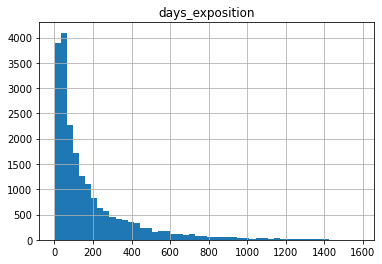

In [15]:
(data
 .query('not days_exposition.isna()')
 .hist('days_exposition',bins=50));

По графику длительности публикации объявления можно увидеть, что незначительная доля квартир продавалась более двух лет - это говорит о том, что, либо человек забыл снять объявление после продажи, либо квартира неинтересна покупателям - такие варианты мы позднее отбросим. 

Что касается заполнения пропусков - мне кажется, что трогать этот столбец не нужно, потому что исходя из описания заказчика он отображает, сколько дней квартира находилась в продаже (т.е. по сути от нажатия кнопки "опубликовать объявление" до нажатия кнопки "снять объявление с продажи"). Если столбец пустой, то, скорее всего, квартира еще не продана.

In [16]:
data['is_apartment'].value_counts()

False    2715
True       50
Name: is_apartment, dtype: int64

Очень много пропусков в столбце с апартаментами. Я думаю, что те, кто продает квартиру, либо вообще не знает о существовании апартаментов, либо не трогал этот столбец. 

А те, кто продает апартаменты, указал это в объявлении, чтобы покупатель понимал, что не сможет получить постоянную регистрацию.

В связи с этим заполним все пропуски значением *False*

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [18]:
print(data['balcony'].unique())
data['balcony'] = data['balcony'].fillna(0)

[nan  2.  0.  1.  5.  4.  3.]


Наверное, есть какие-то роскошные квартиры с пятью балконами, оставим этот показатель. А пропуски заполним нулями, потому что, если балконов нет, то человек мог не трогать эту колонку.

In [19]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

Если человек не указал данные о расположении квартиры, то придумывать их не стоит. Лучше распрощаться с такими строками датасета, потому что для исследования они не пригодны.

In [20]:
data.loc[(data['parks_around_3000']==0) & (data['parks_nearest'].isna()),'parks_nearest'] = 0
data.loc[(data['ponds_around_3000']==0) & (data['ponds_nearest'].isna()),'ponds_nearest'] = 0
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5520
city_centers_nearest    5497
parks_around_3000       5496
parks_nearest           5496
ponds_around_3000       5496
ponds_nearest           5496
days_exposition         3173
dtype: int64

В случае с числом парков и прудов в радиусе 3км от дома получается то же самое, что и в случае с числом балконов. Если стоит пропуск, нужно заменить его на 0.

У нас остались пропуски лишь в картографических данных. Вероятно, произошла ошибка в системе и они не подтянулись самостоятельно. В таком случае можно сгрупировать данные по населенным пунктам и заполнить средними для таких групп.

In [21]:
locality_pivot_table = data.pivot_table(index='locality_name',values=['airports_nearest','city_centers_nearest','parks_nearest','ponds_nearest'],aggfunc='mean')
locality_3000_pivot_table = data.pivot_table(index='locality_name',values=['parks_around_3000','ponds_around_3000'],aggfunc='median')

for city in locality_pivot_table.index:
    for criterion in locality_pivot_table.columns:    
        data.loc[(data[criterion].isna()) & (data['locality_name']==city),criterion] = locality_pivot_table.loc[city,criterion]

for city in locality_3000_pivot_table.index:
    for criterion in locality_3000_pivot_table.columns:    
        data.loc[(data[criterion].isna()) & (data['locality_name']==city),criterion] = locality_3000_pivot_table.loc[city,criterion]

data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5373
city_centers_nearest    5373
parks_around_3000       5373
parks_nearest           5373
ponds_around_3000       5373
ponds_nearest           5373
days_exposition         3173
dtype: int64

После заполнения средними значениями у нас все равно осталось более 5000 пропусков в картографических данных. Следует узнать, почему.

In [22]:
data.loc[~data['locality_name'].isin(locality_pivot_table.index),:]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.73,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.73,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.73,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.73,9.0,17.60,2,False,...,9.00,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23585,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23594,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.73,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23597,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.73,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23598,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.73,3.0,29.70,1,False,...,8.70,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Исходя из этой выборки, данные не подтянулись для всевозможных деревень и посёлков. Скорее всего, это нормально, но заполнять каким-либо образом эту часть датасета точно не стоит, потому что данные не будут соответствовать реальности.

In [23]:
data.loc[~data['locality_name'].isin(locality_pivot_table.index),'locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
       'Кудрово', 'поселок Романовка', 'посёл

Для подтверждения теории выведен список с названиями населенных пунктов, где нет картографических данных. По этому списку можно сказать две вещи: теория подтверждена, а также стоит заняться удалением дубликатов.

#### Изменение типов данных

Теперь перейдем к немаловажному заданию - изменим типы данных у столбцов. Посмотрим, что у нас есть сейчас:

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23601 entries, 0 to 23600
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23601 non-null  int64  
 1   last_price            23601 non-null  float64
 2   total_area            23601 non-null  float64
 3   first_day_exposition  23601 non-null  object 
 4   rooms                 23601 non-null  int64  
 5   ceiling_height        23601 non-null  float64
 6   floors_total          23601 non-null  float64
 7   living_area           23601 non-null  float64
 8   floor                 23601 non-null  int64  
 9   is_apartment          23601 non-null  bool   
 10  studio                23601 non-null  bool   
 11  open_plan             23601 non-null  bool   
 12  kitchen_area          23601 non-null  float64
 13  balcony               23601 non-null  float64
 14  locality_name         23601 non-null  object 
 15  airports_nearest   

Само собой, нужно поменять `first_day_exposition` на тип *datetime*.

Но помимо этого все столбцы, где не может быть отрицательных данных, можно перевести в беззнаковый тип (а там, где не может быть больших чисел, в беззнаковый тип с сокращенным диапазоном значений). Делать это не обязательно, но так мы сможем сократить объем потребляемой памяти.

In [25]:
data['total_images'] = data['total_images'].astype('uint8')
data['last_price'] = data['last_price'].astype('uint')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format=('%Y-%m-%dT%H:%M:%S'))
data['rooms'] = data['rooms'].astype('uint8')
data['floors_total'] = data['floors_total'].astype('uint8')
data['floor'] = data['floor'].astype('uint8')
data['balcony'] = data['balcony'].astype('uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23601 entries, 0 to 23600
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23601 non-null  uint8         
 1   last_price            23601 non-null  uint64        
 2   total_area            23601 non-null  float64       
 3   first_day_exposition  23601 non-null  datetime64[ns]
 4   rooms                 23601 non-null  uint8         
 5   ceiling_height        23601 non-null  float64       
 6   floors_total          23601 non-null  uint8         
 7   living_area           23601 non-null  float64       
 8   floor                 23601 non-null  uint8         
 9   is_apartment          23601 non-null  bool          
 10  studio                23601 non-null  bool          
 11  open_plan             23601 non-null  bool          
 12  kitchen_area          23601 non-null  float64       
 13  balcony         

Действительно, всего 7 преобразований, а потребляемая память сокращена на 25-30%.

#### Удаление дубликатов

Как было выяснено ранее, нужно удалить дубликаты. Они присутствуют в названиях населенных пунктов. Для этого все буквы **ё** нужно заменить на **е**, а также избавиться от всевозможных вариаций со словом *поселок* и оставить только это слово в названиях.

In [26]:
print(f'Число уникальных названий населённых пунктов до удаления неявных дубликатов: {len(data["locality_name"].unique())}')
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','садовое товарищество')
print(f'Число уникальных названий населённых пунктов после удаления неявных дубликатов: {len(data["locality_name"].unique())}')
print(f'Число явных дубликатов в датасете: {data.duplicated().sum()}')

Число уникальных названий населённых пунктов до удаления неявных дубликатов: 364
Число уникальных названий населённых пунктов после удаления неявных дубликатов: 318
Число явных дубликатов в датасете: 0


Такая операция сократила 46 неявных дубликатов. А явных в датасете необнаружено.

#### Устранение аномалий

Еще раз построим графики по всему датасету, чтобы посмотреть, где нужно удалить выбивающиеся значения.

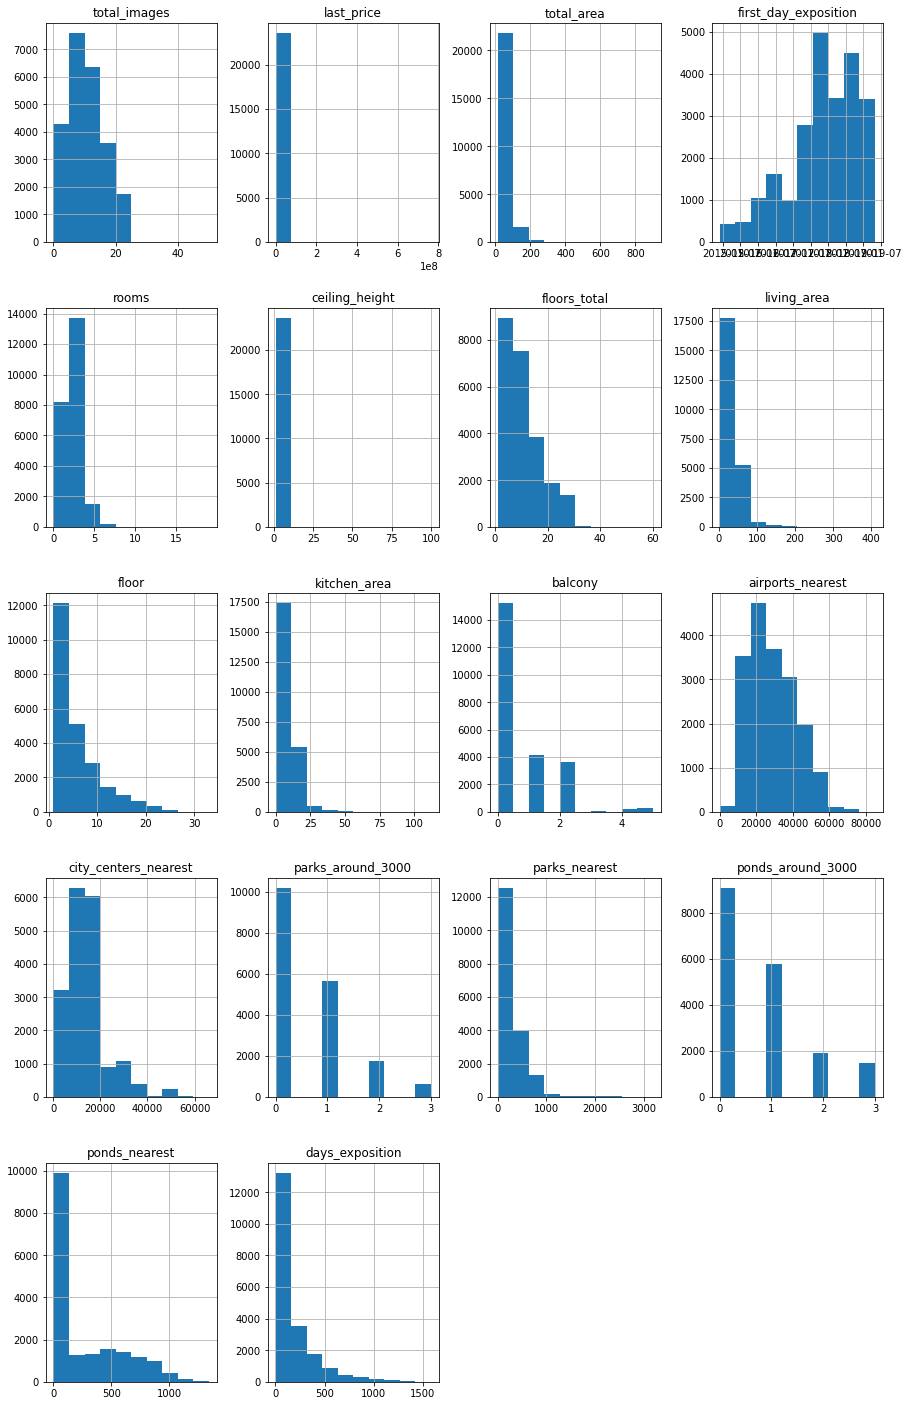

In [27]:
data.hist(figsize=(15,25));

Будем по порядку исправлять каждый столбец. Во-первых, объявлений с числом фотографий более 30 практически нет (что вполне логично, больше и не нужно), поэтому следует удалить такие объявления. 

Сразу перейдем к проверке второго столбца - узнаем, что не так с ценами на квартиры.

In [28]:
data = data.loc[data['total_images']<=30]
data['last_price'].agg(['min','max'])

min        12190
max    763000000
Name: last_price, dtype: int64

Минимальная цена слишком низкая (может, кто-то случайно объявление об аренде разместил в объявлениях о продаже), а максимальная слишком высокая. Ограничим наш датасет более-менее реальными ценами на недвижимость:

In [29]:
data = data.query('500000<last_price<50000000')
data.shape[0]

23431

Генеральная совокупность сильно не уменьшилась, а значит, отброшенные значения были выбросами.

Также следует избавиться от слишком больших квартир. Это могут быть как уникальные строения, не имеющие никакого отношения к общему рынку недвижимости, так и ошибки пользователей, заполнявших данные.

In [30]:
data.loc[data['total_area']>=150,:]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
42,13,22000000,161.8,2015-07-08,4,2.80,4,80.90,2,False,...,17.6,5,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
51,7,45000000,161.0,2017-10-17,3,3.20,8,38.00,4,False,...,50.0,0,Санкт-Петербург,32537.0,6589.0,0.0,0.0,3.0,99.0,541.0
121,20,33000000,180.0,2017-02-17,3,2.90,9,86.00,8,False,...,24.0,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,0.0,144.0
147,10,27700000,179.6,2017-07-06,5,2.85,25,97.20,25,False,...,33.8,2,Санкт-Петербург,19424.0,4489.0,0.0,0.0,1.0,806.0,75.0
177,3,21042018,154.9,2017-09-10,4,3.30,16,89.11,3,False,...,21.3,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,563.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23302,17,30000000,213.0,2017-09-28,7,3.40,5,151.40,5,False,...,30.8,0,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0
23350,3,14700000,180.0,2018-02-08,6,3.00,6,126.00,5,False,...,20.0,0,Санкт-Петербург,23955.0,5089.0,0.0,0.0,2.0,616.0,NaN
23393,20,21800000,250.0,2017-09-16,3,2.73,12,104.00,7,False,...,45.0,0,Санкт-Петербург,43558.0,13138.0,0.0,0.0,0.0,0.0,49.0
23451,5,19600000,184.0,2016-04-21,3,3.00,19,55.70,19,False,...,24.5,5,Санкт-Петербург,18995.0,4837.0,0.0,0.0,0.0,0.0,205.0


Таких строк тоже немного относительно всего датасета.

Так же поступим и со слишком большим числом комнат. Если площадь ограничиваем 150 кв. м., то в среднестатистической квартире точно не может быть более 7 комнат.

In [31]:
data = data.loc[data['total_area']<=150]
data = data.loc[data['rooms']<=7]

Теперь разберемся с высотой потолков. Просмотрим, как много выбросов:

In [32]:
data.groupby('ceiling_height')['ceiling_height'].count().tail(10)

ceiling_height
10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     7
32.0     2
100.0    1
Name: ceiling_height, dtype: int64

In [33]:
data.groupby('ceiling_height')['ceiling_height'].count().head(10)

ceiling_height
1.00     1
1.20     1
1.75     1
2.00    11
2.20     1
2.25     1
2.30     4
2.34     1
2.40    23
2.45    15
Name: ceiling_height, dtype: int64

Выбросы присутствут. Если значения от 24 до 32 метров можно считать ошибкой пользователя, которую можно исправить, разделив на 10 эти числа, то все остальные слишком большие и слишком маленькие значения стоит отбросить.

In [34]:
data.loc[(data['ceiling_height']<=45) & (data['ceiling_height']>=24),'ceiling_height']/=10
data = data.loc[(data['ceiling_height']>=2.4) & (data['ceiling_height']<=4.5)]

Теперь все строки датасета в отношении высоты потолков выглядят правдоподобно. 

Ограничим и площадь кухни. Если общая площадь у нас 150 кв.м., то площадь кухни явно не может быть даже 100 кв.м.
Исходя из гистограммы, большинство значений лежат в диапазоне до 60 кв.м., ограничим этим числом.

In [35]:
data = data.loc[data['kitchen_area']<60]

In [36]:
data.groupby('floors_total')['floors_total'].count().tail(10)

floors_total
26    123
27    163
28     21
29      1
33      1
34      1
35     23
36      3
52      1
60      1
Name: floors_total, dtype: int64

Сверхбольшие дома тоже не следует учитывать для анализа, потому что они искажают другие данные. Поскольку слишком мало объявлений, где число этажей в доме более 28, удалим эти строки.

In [37]:
data = data.loc[data['floors_total']<=28]

И, наконец, отбросим все квартиры, которые продавались более 2 лет. Хоть и 2 года - довольно много для продажи квартиры, но все, что больше, точно уже не является сроком продажи квартиры.

In [38]:
data = data.loc[(data['days_exposition']<=730) | (data['days_exposition'].isna())]

Теперь проверим, не получилось ли неправдоподобных значений, когда мы заполнили пропуски в жилой площади и площади кухни. Сделаем проверку так же, как и в самом начале исследования.

In [39]:
display(data.loc[data['kitchen_area']+data['living_area']>data['total_area']+2,
                 ('kitchen_area','living_area','total_area')])

,kitchen_area,living_area,total_area
871,8.7,30.5,33.0
1274,9.0,17.0,23.0
1536,9.0,20.0,26.0
1587,11.1,63.6,62.4
1600,9.0,17.6,20.1
...,...,...,...
22586,9.0,17.7,23.6
23006,15.1,55.5,66.0
23095,9.0,16.0,18.9
23481,9.0,18.0,24.8


Действительно, такие строки присутствуют, но их не слишком много. Вместо того, чтобы удалить строки, попробуем исправить ошибку: заменим жилую площадь разностью общей площади и площади кухни.

In [40]:
for index in data.loc[data['kitchen_area']+data['living_area']>data['total_area']+2,:].index:
    data.loc[index, 'living_area'] = data.loc[index, 'total_area'] - data.loc[index, 'kitchen_area']

Еще раз выведем все гистограммы, чтобы убедиться, что все аномалии устранены.

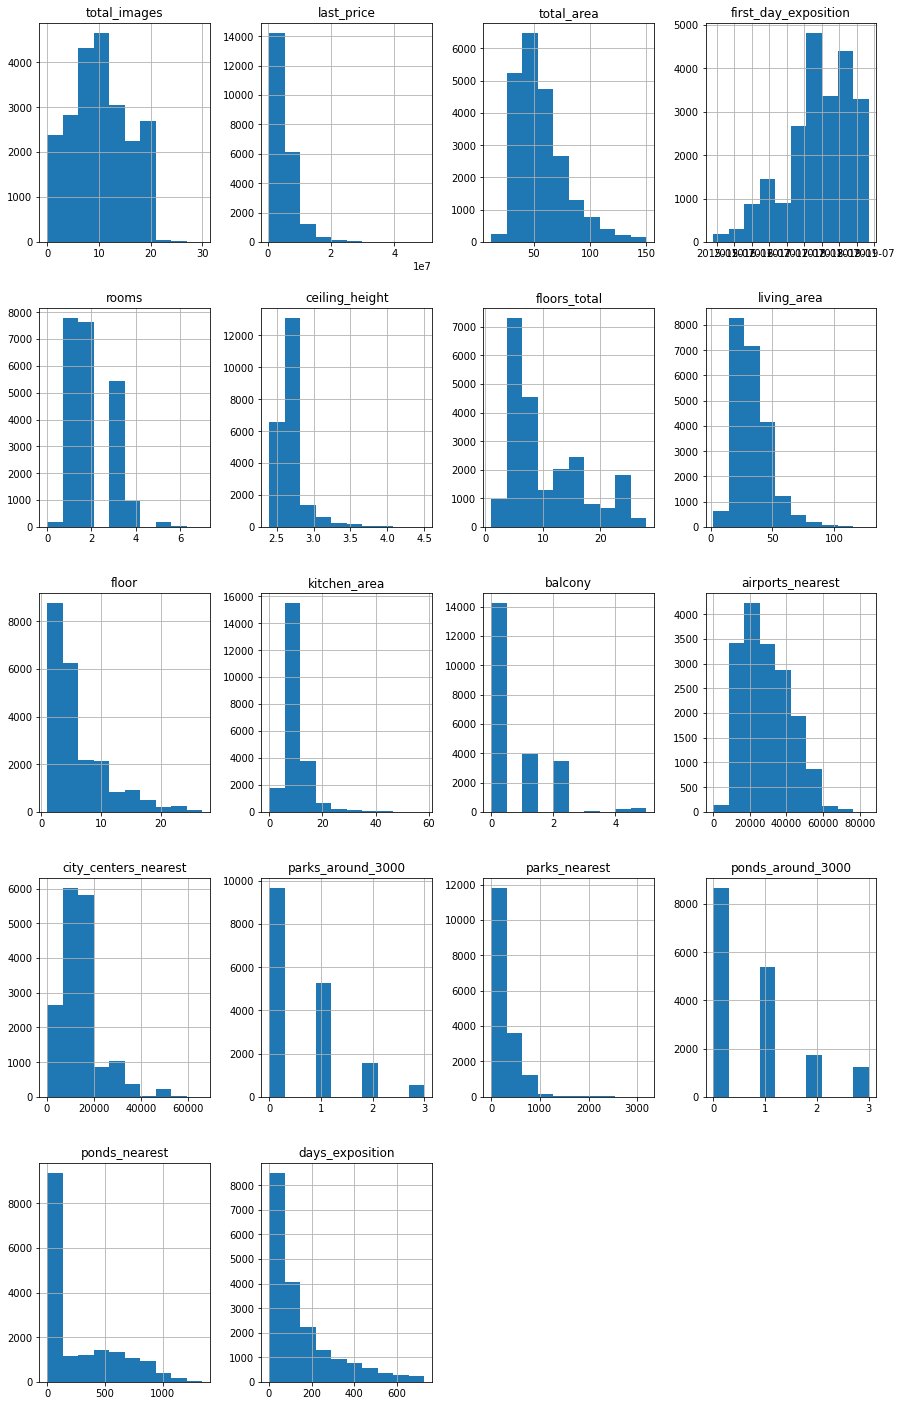

In [41]:
data.hist(figsize=(15,25));

Действительно, все графики напоминают либо нормальное распределение, либо Пирсона. Возможно, стоило ограничить стоимость жилья не 50 млн, а 25-30, т.к. таких объявлений крайне мало. 

### Посчитайте и добавьте в таблицу новые столбцы

In [42]:
data['one_sqr_m_price'] = round(data['last_price']/data['total_area'],2)
data['publication_day'] = data['first_day_exposition'].dt.dayofweek
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year
data['floor_type'] = 'другой'
data.loc[data['floor']==1,'floor_type'] = 'первый'
data.loc[data['floor']==data['floors_total'],'floor_type'] = 'последний'
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000,0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_sqr_m_price,publication_day,publication_month,publication_year,floor_type,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.73,11,18.6,1,False,...,0.0,0.0,0.0,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.73,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.73,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN


В этом блоке комментировать особо нечего. Исходя из ТЗ добавили необходимые нам столбцы в датасет. Обновленный датасет выведен на экран. Эти данные помогут при проведении исследовательского анализа.

### Проведите исследовательский анализ данных

#### Изучение параметров объектов

Будем действовать для всех параметров одинаково - изучим данные из метода `describe()`, который содержит значения среднего и медианы, а также другие полезные данные. Помимо этого выведем гистограммы распределения значений по каждому столбцу.

count    22200.000000
mean        56.172070
std         22.577788
min         12.000000
25%         39.900000
50%         51.000000
75%         67.000000
max        150.000000
Name: total_area, dtype: float64


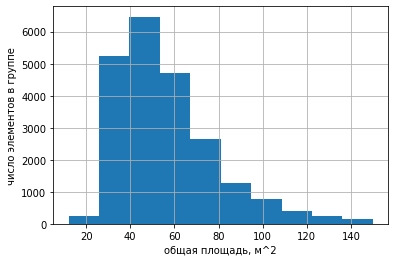

In [43]:
print(data['total_area'].describe())
plt.xlabel('общая площадь, м^2')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['total_area']);

Медиана и среднее для общей площади не сильно различаются, при этом минимальная площадь составляет 12 кв. м.  - минимальная по площади студия. В основном, все представленные в продаже квартиры имеют площадь от 25 до 65 кв.м.

count    22200.000000
mean        31.984651
std         15.086121
min          2.000000
25%         18.100000
50%         30.000000
75%         41.300000
max        128.000000
Name: living_area, dtype: float64


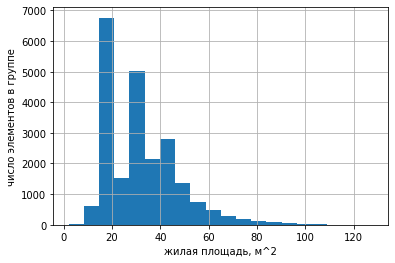

In [44]:
print(data['living_area'].describe())
data['living_area'].describe()
plt.xlabel('жилая площадь, м^2')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['living_area'],bins=20);

Минимальная жилая площадь крайне мала, возможно, это тоже выброс, но таких точно немного, поскольку медиала и среднее не сильно разнятся. В основном, жилая площадь у выставленных квартир находится в диапазоне от 15 до 40 кв.м. Если данные не содержат ошибок, то по этой логике площадь кухни будет находится в диапазоне от 10 до 25 кв.м. для большинства квартир.

count    22200.000000
mean         9.939593
std          4.633749
min          0.000000
25%          7.100000
50%          9.000000
75%         11.062500
max         58.400000
Name: kitchen_area, dtype: float64


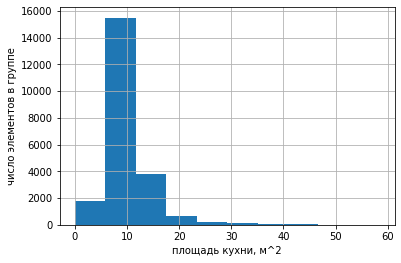

In [45]:
print(data['kitchen_area'].describe())
plt.xlabel('площадь кухни, м^2')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['kitchen_area']);

Есть квартиры без кухни - такое может быть, ведь в датасете есть апартаменты и студии, где вполне может не быть кухни. В основном, площадь кухни у предстваленных квартир находится в диапазоне от 7 до 18 кв.м. Это немного меньше, чем предполагалось, но есть квартиры, где общая площадь больше суммы жилой и площади кухни (вероятно, отдельно считаются какие-нибудь балконы или кладовки). В целом, картина вполне реальная.

count    2.220000e+04
mean     5.591063e+06
std      3.995824e+06
min      5.200000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      4.950000e+07
Name: last_price, dtype: float64


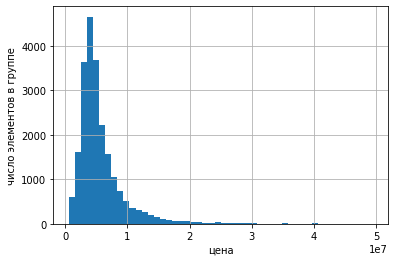

In [46]:
print(data['last_price'].describe())
plt.xlabel('цена')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['last_price'],bins=50);

Гистограмма с ценой квартиры больше напоминает распределение Пирсона, а не нормальное, пока принудительно не увеличить число корзин. Это вполне объяснимо, ведь была поставлена довольно большая планка для максимальной стоимости квартиры в датасете. При увеличении числа корзин до 50 можно увидеть нормальное распределение, где, в основном, квартиры стоят 4-6 млн. руб.

In [47]:
data.loc[data['last_price']>10000000,'total_area'].describe()

count    1983.000000
mean       99.621861
std        22.777937
min        31.000000
25%        82.600000
50%        98.000000
75%       115.100000
max       150.000000
Name: total_area, dtype: float64

При этом, если рассмотреть подробнее дорогие квартиры (дороже 10 млн.), то, как правило, у них очень большая площадь, поэтому цена оправдана.

count    22200.000000
mean         1.992793
std          0.946205
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


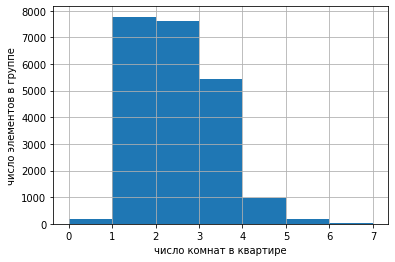

In [48]:
print(data['rooms'].describe())
plt.xlabel('число комнат в квартире')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['rooms'],bins=7);

Больше всего продается квартир с числом комнат от 1 до 3

count    22200.000000
mean         2.717009
std          0.194200
min          2.400000
25%          2.600000
50%          2.730000
75%          2.730000
max          4.500000
Name: ceiling_height, dtype: float64


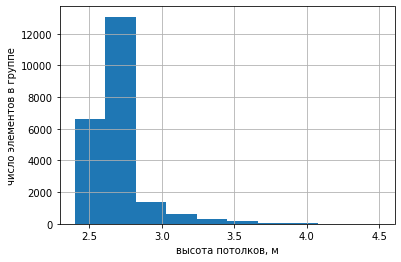

In [49]:
print(data['ceiling_height'].describe())
plt.xlabel('высота потолков, м')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['ceiling_height']);

Высота потолков, как правило, около 2.7м. Странно, что второй и третий квартили совпали. Вероятно, это связано с тем, что квартир с высотой потолков выше 2,7м очень мало.

count    22200.000000
mean         5.889414
std          4.860936
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64


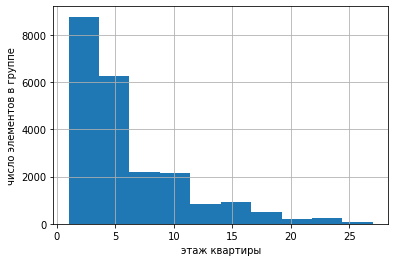

In [50]:
print(data['floor'].describe())
plt.xlabel('этаж квартиры')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['floor']);

Гистограмма этажа квартиры больше похожа на распределение Пирсона. Основная доля продаваемых квартир расположена ниже 6 этажа.

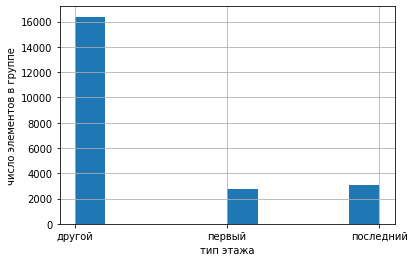

In [51]:
plt.xlabel('тип этажа')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['floor_type']);

Около 5000 вариантов расположены на первом или последнем этаже (примерно поровну), все остальные квартиры находятся на другом этаже.

count    22200.000000
mean        10.716081
std          6.534766
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64


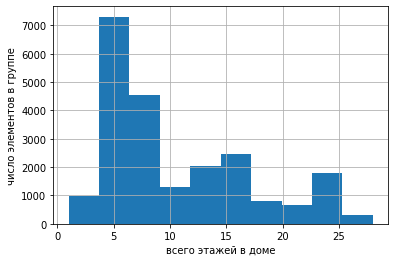

In [52]:
print(data['floors_total'].describe())
plt.xlabel('всего этажей в доме')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['floors_total']);

Больше всего в продаже квартир с низкой этажностью. Есть пик для пятиэтажек и для 14-16-этажек. Выявлена самая популярная этажность дома в Петербурге и области.

count    17028.000000
mean     14510.126401
std       8538.664089
min        208.000000
25%       9857.000000
50%      13266.000000
75%      16448.000000
max      65952.000000
Name: city_centers_nearest, dtype: float64


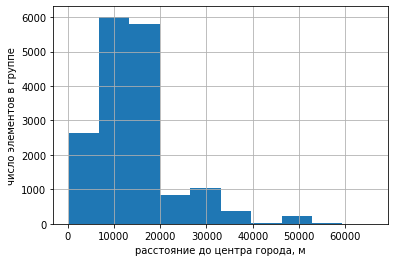

In [53]:
print(data['city_centers_nearest'].describe())
plt.xlabel('расстояние до центра города, м')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['city_centers_nearest']);

В основном, расстояние до центра находится в диапазоне от 10 до 20 км. Вполне реальные показатели для Петербурга.

count    17028.000000
mean     28979.893676
std      12839.872117
min          0.000000
25%      18428.000000
50%      27105.500000
75%      37434.000000
max      84853.000000
Name: airports_nearest, dtype: float64


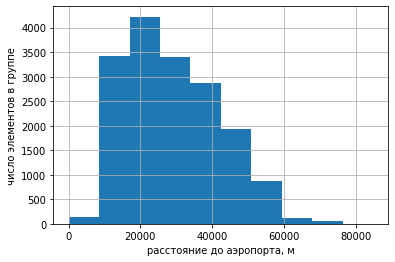

In [54]:
print(data['airports_nearest'].describe())
plt.xlabel('расстояние до аэропорта, м')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['airports_nearest']);

Аэропорты находятся на расстоянии в 20км для большинства квартир. Это также является реальным показателем.

count    17028.000000
mean       213.689612
std        330.816435
min          0.000000
25%          0.000000
50%          0.000000
75%        407.000000
max       3190.000000
Name: parks_nearest, dtype: float64


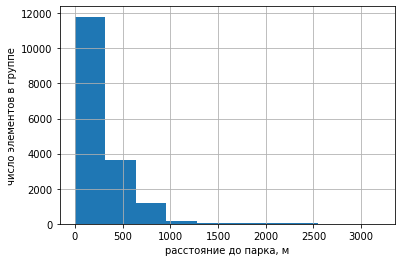

In [55]:
print(data['parks_nearest'].describe())
plt.xlabel('расстояние до парка, м')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['parks_nearest']);

У многих квартир в продаже парки находятся в радиусе 0,5 км. Очень хороший показатель для будущего покупателя.

count    22200.000000
mean         2.574099
std          1.791714
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: publication_day, dtype: float64


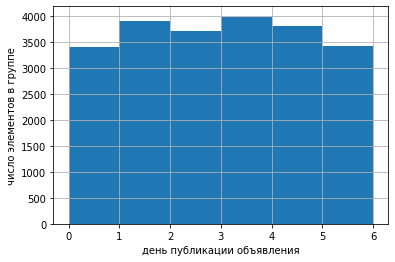

In [56]:
print(data['publication_day'].describe())
plt.xlabel('день публикации объявления')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['publication_day'],bins=6);

Немного чаще объявления выкладывались по вторникам и четвергам, но эта информация особой важности не содержит.

count    22200.000000
mean         6.398333
std          3.487395
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: publication_month, dtype: float64


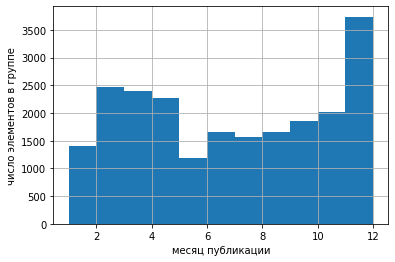

In [57]:
print(data['publication_month'].describe())
plt.xlabel('месяц публикации')
plt.ylabel('число элементов в группе')
plt.grid()
plt.hist(data['publication_month'],bins=11);

А вот месяц публикации чаще приходится на декабрь. В жизни, как правило, так и происходит, потому что риелторам необходимо поднять показатели к концу года, и они пытаются быстро продать квартиру.

#### Скорость продажи квартир (`days_exposition`)

Теперь разберемся со скоростью продажи квартир.

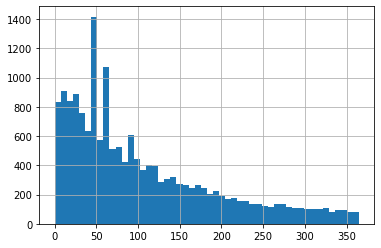

In [58]:
data['days_exposition'].hist(range=(0,365),bins=50);

Проверим статистики для этого столбца:

In [59]:
data['days_exposition'].describe()

count    19193.000000
mean       149.084249
std        154.854803
min          1.000000
25%         43.000000
50%         90.000000
75%        203.000000
max        729.000000
Name: days_exposition, dtype: float64

Среднее сильно отличается от медианы. Вполне объяснимо, ведь в столбце значимая часть "висяков".

In [60]:
def categorize_speed_of_sale(value):
    if 1<=value<=61:
        return 'Быстрая продажа'
    elif 61<value<=181:
        return 'Обычная продажа'
    elif 181<value<=366:
        return 'Медленная продажа'
    elif 366<value<731:
        return 'Крайне медленная продажа'
    else:
        return 'Квартира еще не продана'
data['days_exposition_categ'] = data['days_exposition'].apply(categorize_speed_of_sale)
data['days_exposition_categ'].value_counts()

Быстрая продажа             7599
Обычная продажа             6130
Медленная продажа           3299
Квартира еще не продана     3007
Крайне медленная продажа    2165
Name: days_exposition_categ, dtype: int64

После категоризации можно сделать вывод, что многие квартиры продаются не более, чем за полгода.

#### Влияние разных факторов на общую стоимость квартиры

Коэффициент корреляции =  0.73


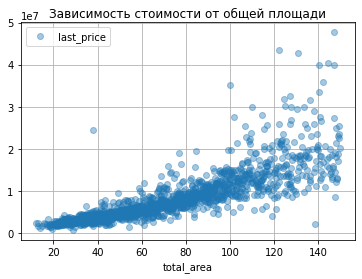

In [61]:
data.pivot_table(index='total_area',values='last_price').plot(style='o',alpha=0.4,grid=True)
plt.title('Зависимость стоимости от общей площади')
print('Коэффициент корреляции = ',data['last_price'].corr(data['total_area']).round(2))

По графику можно увидеть немного выбросов, но прослеживается и сильная зависимость стоимости от площади квартиры, что подтверждается коэффициентом корреляции.

Коэффициент корреляции =  0.59


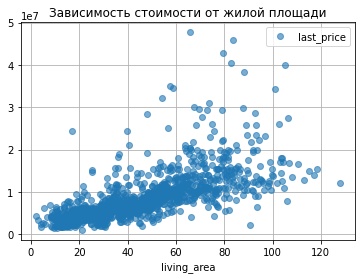

In [62]:
data.pivot_table(index='living_area',values='last_price').plot(style='o',alpha=0.6,grid=True)
plt.title('Зависимость стоимости от жилой площади')
print('Коэффициент корреляции = ',data['last_price'].corr(data['living_area']).round(2))

График по жилой площади менее сгруппированный и содержит больше выбросов, отсюда, как следствие, чуть меньший коэффициент корреляции и, получается, что жилая площадь не так сильно влияет на цену квартиры.

Коэффициент корреляции =  0.55


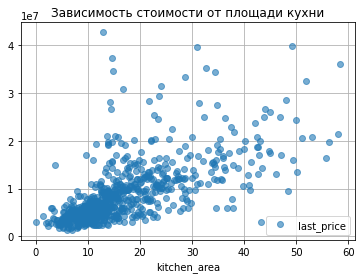

In [63]:
data.pivot_table(index='kitchen_area',values='last_price').plot(style='o',alpha=0.6,grid=True)
plt.title('Зависимость стоимости от площади кухни')
print('Коэффициент корреляции = ',data['last_price'].corr(data['kitchen_area']).round(2))

Для площади кухни график еще больше распространился по координатной плоскости, не такой "кучный" и содержит еще больше выбросов. Отсюда, как следствие, еще меньший коэффициент корреляции Пирсона и еще меньшая связь с ценой квартиры.

Коэффициент корреляции =  0.43


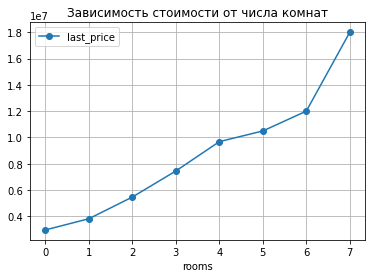

In [64]:
data.pivot_table(index='rooms',values='last_price').plot(style='o-',grid=True)
plt.title('Зависимость стоимости от числа комнат')
print('Коэффициент корреляции = ',data['last_price'].corr(data['rooms']).round(2))

Как ни странно, чем больше комнат в квартире, тем она дороже, но здесь, скорее, влияет не число комнат, а то, что с ростом комнат растёт и площадь. Поэтому коэффициент корреляции у числа комнат и стоимости квартиры самый низкий из всех четырех расчитанных.

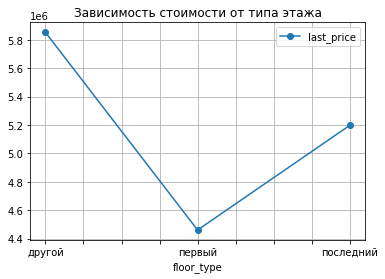

In [65]:
data.pivot_table(index='floor_type',values='last_price').plot(style='o-',grid=True)
plt.title('Зависимость стоимости от типа этажа');

Исходя из графика, первый этаж ценится меньше всего. В жизни так и происходит.

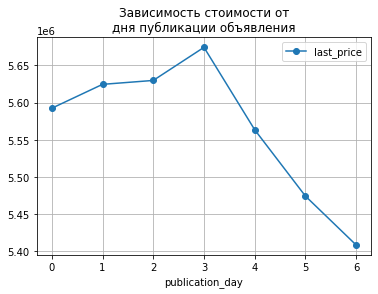

In [66]:
data.pivot_table(index='publication_day',values='last_price').plot(style='o-',grid=True)
plt.title('Зависимость стоимости от\nдня публикации объявления');

Средняя стоимость квартиры для дня публикации лежит в диапазоне от 5,4 млн до 5,7 млн. Разброс невелик, но люди, публикующие квартиру в четверг, ставят самый высокий ценник, а люди, публикующие в воскресенье, самый низкий (это еще хоть как-то можно приплести к тому, что человек рассчитывает на моментальную продажу в выходной).

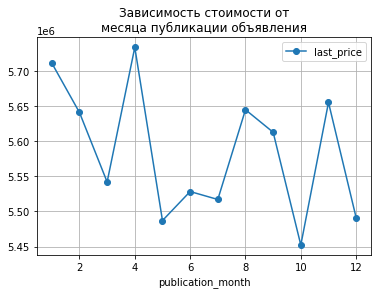

In [67]:
data.pivot_table(index='publication_month',values='last_price').plot(style='o-',grid=True)
plt.title('Зависимость стоимости от\nмесяца публикации объявления');

По графику зависимости стоимости квартиры от месяца можно сказать лишь то, что меньшая цена в конце года обусловлена тем, что нужно скорее продать квартиру в этом году.

Text(0.5, 1.0, 'Зависимость стоимости от\nгода публикации объявления')

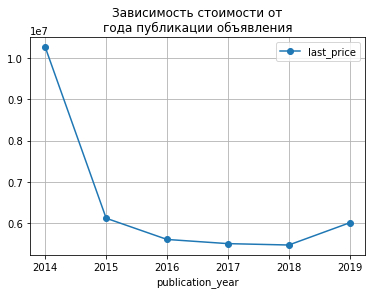

In [68]:
data.pivot_table(index='publication_year',values='last_price').plot(style='o-',grid=True)
plt.title('Зависимость стоимости от\nгода публикации объявления')

Подозрительно высокая цена квартир в 2014 году. В 2015 уже лучше, но все равно по логике она должна быть меньше, чем в 2016, ведь недвижимость постоянно дорожает. Проверим равнозначность выборок.

Text(0.5, 1.0, 'Зависимость стоимости квадратного метра от\nгода публикации объявления')

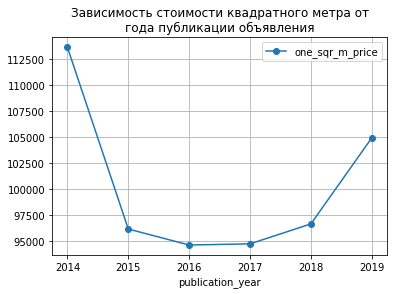

In [69]:
data.pivot_table(index='publication_year',values='one_sqr_m_price').plot(style='o-',grid=True)
plt.title('Зависимость стоимости квадратного метра от\nгода публикации объявления')

Text(0.5, 1.0, 'Зависимость общей площади от\nгода публикации объявления')

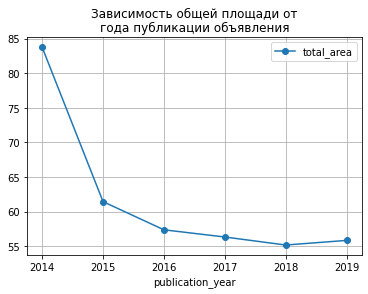

In [70]:
data.pivot_table(index='publication_year',values='total_area').plot(style='o-',grid=True)
plt.title('Зависимость общей площади от\nгода публикации объявления')

In [71]:
data['publication_year'].value_counts()

2018    8305
2017    7898
2019    2799
2016    2423
2015     722
2014      53
Name: publication_year, dtype: int64

Оказывается, крайне мало информации об объявлениях, опубликованных в 2014-2015 годах. Все 3 графика (зависимости стоимости от года, стоимости квадратного метра от года и площади квартиры от года) по своему виду похожи друг на друга. Поэтому высокая стоимость квартир в 2014 и 2015 годах обусловлена тем, что продавались, в основном, большие квартиры. Судить о росте или падении цен по этим годам не получится, поскольку выборка по сравнению с другими годами нерепрезентативна.

Больше интересен скачок в 2019. Его тоже можно объяснить. За 2017 и 2018 годы опубликовывали около 8000 объявлений в год. А в 2019 всего 2799. Значит, в выборке нет данных по всему году, а исходя из предыдущего графика зависимости стоимости от месяца в начале года люди ставят высокую цену. Также можно провести параллель с реальной жизнью и вспомнить, что в начале 2019 года резко начало дорожать все, поэтому рост может быть связан не только с тем, что данные за 2019 год неполные.

#### Исследование цены одного квадратного метра

Как и требуется в задании, соберем топ-10 дорогих населённых пунктов Ленинградской области.

Диапазон средней цены на квадратный метр: 58279.49 - 111429.07


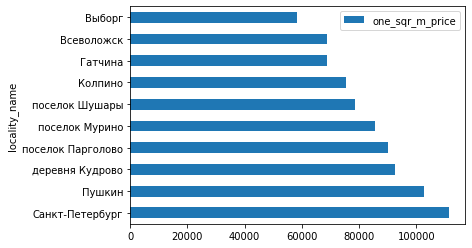

In [72]:
ind= (data
 .groupby('locality_name')['one_sqr_m_price']
 .count()
 .sort_values(ascending=False)
 .head(10))
price_stat = (data
 .pivot_table(index='locality_name',values='one_sqr_m_price')
 .loc[ind.index,:]
 .round(2)
 .sort_values(by='one_sqr_m_price',ascending=False))
price_stat.plot(kind='barh')
print(f'Диапазон средней цены на квадратный метр: {min(price_stat["one_sqr_m_price"])} - {max(price_stat["one_sqr_m_price"])}')

Полученный график отсортирован для наглядности. Как ни странно, чем больше город, тем дороже в нем недвижимось. Возможно, деревни и поселки, представленные в топе, юридически входят в состав Санкт-Петербурга, либо являются элитными поселками.

#### Изучение влияния расстояния от центра города на цену за квадратный метр

По логике, чем ближе квартира к центру, тем она дороже. Проверим это.

Text(0.5, 1.0, 'Цена одного квадратного метра\nв зависимости от расстояния до центра')

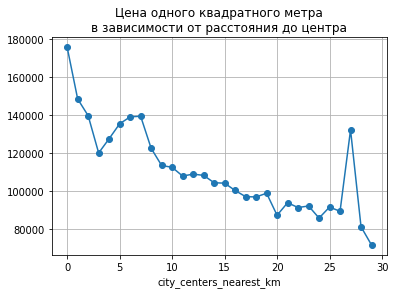

In [73]:
(data
 .loc[data['locality_name']=='Санкт-Петербург']
 .groupby('city_centers_nearest_km')['one_sqr_m_price']
 .mean()
 .plot(style='o-',grid=True))
plt.title('Цена одного квадратного метра\nв зависимости от расстояния до центра')

Действительно, с увеличениием расстояния от центра цена на квадратный метр падает. Есть всплеск около 26 километров от центра. Это окраина города, и предположение такое же, как и в топ-10 дорогих населенных пунктов по стоимости одного квадратного метра.

### Общий вывод

Было проведено исследование архива объявлений о продаже квартир в Санкт-Петербурге и ближайших к нему населенных пунктах.

Все этапы анализа данных были проведены: от предобработки до решения поставленной задачи.

Выяснилось, что часть данных не пригодна для анализа ввиду неправдоподбных значений, и такая информация не учитывалась при решении.

Было выяснено, что больше всего на стоимость квартиры влияет ее площадь. Такие факторы, как жилая площадь, площадь кухни и число комнат оказывают меньшее влияение, что вполне объяснимо, ведь по факту они входят в саму площадь квартиры.

Также меньше всего ценятся квартиры на первом этаже. Так всегда было, есть и будет.

Исходя из полученного топ-10 городов по стоимости квадратного метра, областной центр оказался самым дорогим, что вполне логично, ведь вся инфраструктура находится там.

Внутри Петербурга чем дальше квартира находится от центра, тем она дешевле. Есть небольшой всплеск около 26 км от центра, но, скорее всего, он связан с тем, что там могут находится элитные жилые комплексы, где цена будет дороже.